<a href="https://colab.research.google.com/github/techwack/blind-indoor-object-detection/blob/main/blindobjectdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics

In [2]:
!pip install kaggle

In [3]:
from tqdm.notebook import tqdm

In [4]:
!pip install gTTS

In [5]:
from gtts import gTTS
from IPython.display import Audio, display

In [6]:
def text_to_speech(text, filename='output.mp3'):
    tts = gTTS(text=text, lang='en')
    tts.save(filename)
    return filename


In [7]:
from ultralytics import YOLO
print("YOLOv8 installed successfully!")

YOLOv8 installed successfully!


In [8]:
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"dj0535","key":"70f324202920765ff88a8d5a5acf8754"}'}

In [9]:
# Create a directory for Kaggle
!mkdir -p ~/.kaggle

# Move the kaggle.json file to the correct location
!cp kaggle.json ~/.kaggle/

# Change the permissions of the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json

In [10]:
!kaggle datasets download -d thepbordin/indoor-object-detection

Dataset URL: https://www.kaggle.com/datasets/thepbordin/indoor-object-detection
License(s): GNU Lesser General Public License 3.0
indoor-object-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [11]:
!unzip indoor-object-detection.zip -d /content/indoor-object-detection

Archive:  indoor-object-detection.zip
replace /content/indoor-object-detection/data.yaml? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace /content/indoor-object-detection/data.yaml? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/indoor-object-detection/data.yaml  
  inflating: /content/indoor-object-detection/test/images/1003.png  
  inflating: /content/indoor-object-detection/test/images/1014.png  
  inflating: /content/indoor-object-detection/test/images/1015.png  
  inflating: /content/indoor-object-detection/test/images/1020.png  
  inflating: /content/indoor-object-detection/test/images/1021.png  
  inflating: /content/indoor-object-detection/test/images/1023.png  
  inflating: /content/indoor-object-detection/test/images/1026.png  
  inflating: /content/indoor-object-detection/test/images/1027.png  
  inflating: /content/indoor-object-detection/test/images/1028.png  
  inflating: /content/indoor-object-detection/test/images/1029.png  
 

In [12]:
import os

# List the contents of the unzipped folder
os.listdir('/content/indoor-object-detection')

['valid', 'train', 'data.yaml', 'test']

In [13]:
# Check the contents of data.yaml
with open('/content/indoor-object-detection/data.yaml', 'r') as f:
    print(f.read())

train: /content/data/train/images
val: /content/data/valid/images
test: /content/data/test/images
nc: 10
names: 
- door
- cabinetDoor
- refrigeratorDoor
- window
- chair
- table
- cabinet
- couch
- openedDoor
- pole


In [14]:
import os

# List the contents of the train and valid directories
print("Train Images:", os.listdir('/content/indoor-object-detection/train/images'))
print("Train Labels:", os.listdir('/content/indoor-object-detection/train/labels'))
print("Valid Images:", os.listdir('/content/indoor-object-detection/valid/images'))
print("Valid Labels:", os.listdir('/content/indoor-object-detection/valid/labels'))
print("Test Images:", os.listdir('/content/indoor-object-detection/test/images'))

Train Images: ['05867de435365596.jpg', 'bf54629b50fa0623.jpg', '0cbefb4eef9e1f02.jpg', '709f5e46880ba7cf.jpg', '0322fade74e6a40d.jpg', '3faeb802f7270ce5.jpg', 'fc8e78e65a4f4473.jpg', '91d3ab02785e48de.jpg', '236a3e3f89a05843.jpg', '90e23144d905d72a.jpg', '0e872e10f2531364.jpg', '26791f7f58b801e5.jpg', '50fa7f3914b3d38c.jpg', '0bc37b99b3e65f06.jpg', '900eedc68d55662a.jpg', '4841959e5e9278ef.jpg', '0d48650c19108b75.jpg', '9e5a46db2634a63e.jpg', '326fcb1f54d4419b.jpg', '142745fd0af3aae6.jpg', '8896b5a5c0abaf84.jpg', '742b8684073d6fd6.jpg', '4508de4f680374a7.jpg', '0c01e89a58eb20a2.jpg', '00f0152f65a68569.jpg', '0cc3d0c94666272e.jpg', '0db9d88d9eb1992a.jpg', '8ce7545def57cf8d.jpg', '01b8f3f2d2cf7613.jpg', '40bc03bdddd567c3.jpg', '9b8bd162c0cb98f1.jpg', '4f5cb2b206085851.jpg', '401524b30fa05ab1.jpg', '33afe4d6bf179557.jpg', '0d75f4d0712d4dd7.jpg', '1f481ece45be4cb9.jpg', '1a0b468e0a8e9526.jpg', '22544ddbf28eb989.jpg', '7e5dfa5105e66299.jpg', '159aae161d6b60ff.jpg', 'a6c770c55743d796.jpg', '

In [15]:
with open('/content/indoor-object-detection/data.yaml', 'r') as file:
    data = file.read()
    print(data)


train: /content/data/train/images
val: /content/data/valid/images
test: /content/data/test/images
nc: 10
names: 
- door
- cabinetDoor
- refrigeratorDoor
- window
- chair
- table
- cabinet
- couch
- openedDoor
- pole


In [16]:
# Python code to modify data.yaml
with open('/content/indoor-object-detection/data.yaml', 'w') as file:
    file.write("""train: /content/indoor-object-detection/train/images
val: /content/indoor-object-detection/valid/images
test: /content/indoor-object-detection/test/images
nc: 10
names:
  - door
  - cabinetDoor
  - refrigeratorDoor
  - window
  - chair
  - table
  - cabinet
  - couch
  - openedDoor
  - pole
""")


In [19]:
# Load the YOLO model
model = YOLO("yolov8n.pt")  # You can use a pre-trained model or specify another model variant (e.g., yolov8s.pt for a smaller model)

# Train the model
model.train(
    data='/content/indoor-object-detection/data.yaml',  # Path to the dataset YAML file
    epochs=50,  # Number of training epochs (you can adjust)
    imgsz=320,  # Image size
    batch=4,  # Batch size (adjust based on your GPU)
    workers=4,  # Number of workers for data loading
)


Ultralytics 8.3.32 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/indoor-object-detection/data.yaml, epochs=50, time=None, patience=100, batch=4, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

train: Scanning /content/indoor-object-detection/train/labels.cache... 1008 images, 120 backgrounds, 0 corrupt: 100%|██████████| 1012/1012 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/indoor-object-detection/valid/labels.cache... 230 images, 31 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<?, ?it/s]


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 2 dataloader workers
Logging results to runs/detect/train5
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50     0.426G      1.845      3.831        1.5         43        320: 100%|██████████| 253/253 [00:29<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  5.88it/s]

                   all        230       1289      0.538      0.128     0.0876     0.0474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      0.35G      1.762      2.928      1.392         22        320: 100%|██████████| 253/253 [00:26<00:00,  9.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  8.88it/s]


                   all        230       1289      0.439      0.206      0.109     0.0549

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50     0.338G      1.733      2.595      1.386         25        320: 100%|██████████| 253/253 [00:26<00:00,  9.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  9.38it/s]


                   all        230       1289      0.493      0.217      0.157      0.075

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50     0.312G      1.681      2.349      1.349         36        320: 100%|██████████| 253/253 [00:27<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 11.09it/s]

                   all        230       1289        0.5      0.231      0.174     0.0914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50     0.329G      1.667      2.277      1.343         29        320: 100%|██████████| 253/253 [00:28<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 11.17it/s]

                   all        230       1289      0.511      0.226       0.17      0.094



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50     0.308G      1.658      2.207      1.334         47        320: 100%|██████████| 253/253 [00:28<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 10.83it/s]

                   all        230       1289      0.584      0.256      0.209      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50     0.308G      1.633      2.142      1.322         32        320: 100%|██████████| 253/253 [00:28<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 11.09it/s]

                   all        230       1289      0.584      0.231      0.193      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50     0.308G      1.602      2.086      1.299         24        320: 100%|██████████| 253/253 [00:29<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 11.15it/s]

                   all        230       1289      0.572      0.261       0.23      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50     0.304G      1.574      2.051      1.292         32        320: 100%|██████████| 253/253 [00:28<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 11.42it/s]

                   all        230       1289      0.517      0.293      0.215      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50     0.323G      1.556      1.995      1.288         31        320: 100%|██████████| 253/253 [00:28<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 11.23it/s]

                   all        230       1289      0.451      0.255       0.24      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50     0.302G      1.538      1.979       1.28         20        320: 100%|██████████| 253/253 [00:27<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 11.07it/s]

                   all        230       1289      0.596      0.281      0.259      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50     0.302G      1.524      1.911      1.263         16        320: 100%|██████████| 253/253 [00:28<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 10.87it/s]

                   all        230       1289      0.486       0.27      0.257      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50     0.315G        1.5      1.874      1.266         76        320: 100%|██████████| 253/253 [00:28<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 11.27it/s]

                   all        230       1289      0.616      0.257      0.265      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50     0.302G      1.512       1.88      1.259         25        320: 100%|██████████| 253/253 [00:27<00:00,  9.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 11.43it/s]

                   all        230       1289      0.592      0.277      0.269      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50     0.302G      1.518      1.859      1.265         49        320: 100%|██████████| 253/253 [00:28<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 11.22it/s]

                   all        230       1289      0.623      0.271      0.268      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50     0.323G      1.507      1.844      1.249         27        320: 100%|██████████| 253/253 [00:27<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 11.63it/s]

                   all        230       1289      0.518      0.305      0.301      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50     0.323G      1.483      1.803      1.245         47        320: 100%|██████████| 253/253 [00:27<00:00,  9.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  7.96it/s]

                   all        230       1289      0.475      0.306      0.286      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50     0.302G      1.486      1.799       1.26         34        320: 100%|██████████| 253/253 [00:26<00:00,  9.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.17it/s]


                   all        230       1289      0.491      0.295      0.278      0.162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50     0.302G      1.472      1.783      1.236         37        320: 100%|██████████| 253/253 [00:26<00:00,  9.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.01it/s]


                   all        230       1289      0.539      0.268      0.298      0.177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50     0.323G      1.468      1.724      1.227         65        320: 100%|██████████| 253/253 [00:25<00:00,  9.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.70it/s]


                   all        230       1289      0.504      0.321      0.302      0.173

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50     0.302G      1.444      1.697      1.228         25        320: 100%|██████████| 253/253 [00:26<00:00,  9.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  8.15it/s]


                   all        230       1289      0.537      0.302      0.304      0.175

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50     0.323G      1.423      1.694      1.212         29        320: 100%|██████████| 253/253 [00:26<00:00,  9.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 10.46it/s]

                   all        230       1289      0.627       0.29        0.3      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50     0.302G      1.415      1.662      1.215         18        320: 100%|██████████| 253/253 [00:27<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 11.30it/s]

                   all        230       1289      0.643      0.307      0.297      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50     0.323G      1.424      1.705      1.215         66        320: 100%|██████████| 253/253 [00:28<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 11.15it/s]

                   all        230       1289       0.41      0.304      0.291      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50     0.302G      1.417       1.65      1.208         23        320: 100%|██████████| 253/253 [00:28<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 11.30it/s]

                   all        230       1289      0.503      0.333      0.309      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50     0.302G      1.426      1.659      1.204         23        320: 100%|██████████| 253/253 [00:28<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 11.37it/s]

                   all        230       1289      0.541      0.294      0.299      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50     0.302G      1.394      1.637      1.199         31        320: 100%|██████████| 253/253 [00:28<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 11.21it/s]

                   all        230       1289      0.547      0.298      0.315      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50     0.302G      1.413       1.61      1.193         34        320: 100%|██████████| 253/253 [00:27<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 11.69it/s]

                   all        230       1289      0.503      0.307      0.315      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50     0.323G       1.41      1.599      1.196         11        320: 100%|██████████| 253/253 [00:28<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 11.48it/s]

                   all        230       1289      0.617      0.317      0.312      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50     0.302G      1.385      1.533      1.184         43        320: 100%|██████████| 253/253 [00:28<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 11.38it/s]

                   all        230       1289      0.484      0.329      0.306      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50     0.302G      1.384      1.545       1.19         11        320: 100%|██████████| 253/253 [00:28<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 11.66it/s]

                   all        230       1289      0.639      0.309      0.322      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50     0.315G      1.375       1.54       1.18         53        320: 100%|██████████| 253/253 [00:28<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 11.32it/s]

                   all        230       1289      0.525      0.353      0.316      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50     0.323G      1.376      1.515      1.189         46        320: 100%|██████████| 253/253 [00:28<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 11.26it/s]

                   all        230       1289      0.523      0.337       0.33      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50     0.323G      1.369      1.496       1.19        111        320: 100%|██████████| 253/253 [00:27<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 10.16it/s]

                   all        230       1289      0.448      0.318      0.318      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50     0.323G      1.358      1.478      1.171         22        320: 100%|██████████| 253/253 [00:26<00:00,  9.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.64it/s]

                   all        230       1289      0.399      0.363      0.329      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50     0.302G      1.348      1.465      1.167         36        320: 100%|██████████| 253/253 [00:26<00:00,  9.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.16it/s]


                   all        230       1289      0.408      0.341      0.312      0.189

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50     0.302G      1.358      1.466      1.172         32        320: 100%|██████████| 253/253 [00:25<00:00,  9.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  7.19it/s]


                   all        230       1289      0.556      0.297      0.322       0.19

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50     0.315G      1.364      1.414       1.16         43        320: 100%|██████████| 253/253 [00:27<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  9.22it/s]


                   all        230       1289       0.53       0.33      0.328      0.196

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       0.3G       1.35      1.428      1.172         32        320: 100%|██████████| 253/253 [00:27<00:00,  9.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 11.04it/s]


                   all        230       1289      0.414      0.353      0.332      0.197

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       0.3G      1.342      1.423      1.161         50        320: 100%|██████████| 253/253 [00:28<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 11.30it/s]

                   all        230       1289      0.563      0.308      0.332      0.194


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       0.3G      1.332      1.508      1.168          5        320: 100%|██████████| 253/253 [00:29<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 10.85it/s]

                   all        230       1289      0.535       0.32      0.325      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       0.3G      1.299      1.381      1.146          7        320: 100%|██████████| 253/253 [00:28<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 11.41it/s]

                   all        230       1289      0.541      0.341      0.329      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       0.3G      1.288      1.352      1.147          7        320: 100%|██████████| 253/253 [00:28<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 10.98it/s]

                   all        230       1289      0.484      0.318      0.337      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       0.3G      1.289       1.36      1.146          9        320: 100%|██████████| 253/253 [00:28<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 10.84it/s]

                   all        230       1289      0.459      0.333      0.333      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50       0.3G      1.285      1.335      1.145         53        320: 100%|██████████| 253/253 [00:28<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 11.35it/s]

                   all        230       1289      0.463      0.324      0.335        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       0.3G      1.268       1.29       1.13         28        320: 100%|██████████| 253/253 [00:28<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:02<00:00, 11.25it/s]

                   all        230       1289      0.563      0.319      0.333      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       0.3G      1.261      1.278      1.129         28        320: 100%|██████████| 253/253 [00:27<00:00,  9.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.05it/s]

                   all        230       1289      0.594      0.309      0.339      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50       0.3G      1.266      1.266      1.137         14        320: 100%|██████████| 253/253 [00:26<00:00,  9.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.48it/s]


                   all        230       1289      0.602      0.313      0.344      0.203

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       0.3G      1.258      1.273      1.136         27        320: 100%|██████████| 253/253 [00:26<00:00,  9.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  8.06it/s]


                   all        230       1289      0.583       0.32      0.339      0.201

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       0.3G      1.275      1.287      1.129         16        320: 100%|██████████| 253/253 [00:27<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:03<00:00,  8.09it/s]


                   all        230       1289      0.606      0.304      0.343      0.204

50 epochs completed in 0.439 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 6.2MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics 8.3.32 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.94it/s]


                   all        230       1289      0.604      0.303      0.343      0.204
                  door         63         97      0.554      0.423      0.486      0.312
           cabinetDoor         99        765        0.8      0.586        0.7      0.386
      refrigeratorDoor         85        192      0.784      0.724      0.795      0.525
                window         39         91      0.537      0.264      0.319      0.192
                 chair         24         49      0.513      0.388      0.445      0.186
                 table         30         40      0.285       0.15      0.142     0.0632
               cabinet         28         32      0.573        0.5      0.488      0.356
                 couch          1          1          1          0     0.0136    0.00954
            openedDoor         13         13          0          0     0.0322     0.0111
                  pole          4          9          1          0    0.00593    0.00305
Speed: 0.2ms preproce

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ea36c411a50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

In [20]:
metrics = model.val()  # This will compute metrics like mAP, precision, and recall
print(metrics)

Ultralytics 8.3.32 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/indoor-object-detection/valid/labels.cache... 230 images, 31 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:03<00:00, 15.65it/s]


                   all        230       1289      0.603      0.304      0.343      0.205
                  door         63         97      0.542      0.423      0.477      0.315
           cabinetDoor         99        765      0.799      0.591      0.699      0.386
      refrigeratorDoor         85        192      0.783      0.724      0.796      0.525
                window         39         91      0.546      0.264      0.324      0.194
                 chair         24         49      0.512      0.388      0.448      0.185
                 table         30         40      0.276       0.15      0.137     0.0624
               cabinet         28         32      0.571        0.5      0.497      0.364
                 couch          1          1          1          0     0.0136    0.00772
            openedDoor         13         13          0          0     0.0301     0.0108
                  pole          4          9          1          0    0.00589    0.00269
Speed: 0.1ms preproce

In [21]:
model.save("yolov8n_trained.pt")  # Save the trained model

In [25]:
from google.colab import files
uploaded = files.upload()

Saving cabinet.jpg to cabinet.jpg



image 1/1 /content/cabinet.jpg: 640x640 2 cabinetDoors, 12.0ms
Speed: 3.4ms preprocess, 12.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


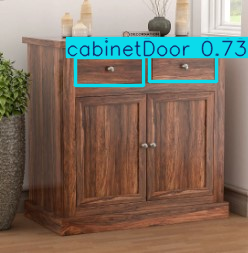

In [26]:
# Load the trained model
model = YOLO("yolov8n_trained.pt")  # Make sure this is the correct path to your model file

# Perform inference on the uploaded image
results = model.predict("cabinet.jpg")  # Use the name of your uploaded image file

# Display results
result = results[0]  # Access the first result
result.show()  # This will show the image with bounding boxes

# Step 7: Get detected objects
detected_objects = result.boxes.xyxy  # Get detections in xyxy format
confidences = result.boxes.conf  # Get confidences
classes = result.boxes.cls  # Get class indices

# Step 8: Prepare a summary of detected objects
summary = []
for i in range(len(detected_objects)):
    label = model.names[int(classes[i])]  # Convert class index to label
    confidence = confidences[i].item()  # Get confidence as a float
    summary.append(f"Detected {label} with confidence {confidence:.2f}")

# Combine the summary into a single string
summary_text = " ".join(summary) if summary else "No objects detected."

# Step 9: Use text-to-speech to read out the summary
def text_to_speech(text, filename='output.mp3'):
    tts = gTTS(text=text, lang='en')
    tts.save(filename)
    return filename

audio_file = text_to_speech(summary_text)
audio = Audio(audio_file, autoplay=True)

# Step 10: Play the audio
display(audio)  # Display the audio widget